# 딥러닝을 위한 PyTorch 활용법
## Chapter 2. Linear Regression
- Linear Data
- Linear Model
- y = 2x + 3

In [12]:
import numpy as np
import torch
import torch.nn as nn # Linear 함수
import torch.optim as optim # gradient
import torch.nn.init as init # 초기값
from torch.autograd import Variable # 모델 학습용

In [ ]:
# visdom은 페이스북에서 제공하는 시각화 툴이다.

from visdom import Visdom
viz = Visdom()

## Generate Data
- normal -> normal_
- uniform -> uniform_
- 강의와 버젼이 다름

In [13]:
num_data = 1000
num_epoch = 1000

noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
x = init.uniform_(torch.FloatTensor(num_data, 1), -10,10)

y = 3*x + 5
y_noise = y + noise

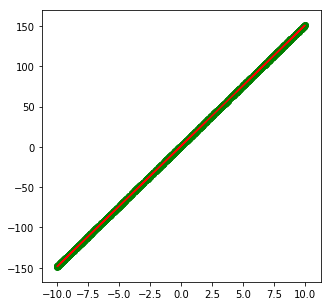

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (5, 5))
plt.plot(x.numpy(), y.numpy(), color = 'r')
plt.scatter(x.numpy(), y.numpy(), color = 'g')

## Model & Optimizer

In [29]:
model = nn.Linear(1,1) # input, output size
output = model(Variable(x)) # 

loss_func = nn.MSELoss() # 이 매트릭(matric)으로 loss를 측정하겠다.
optimizer = optim.SGD(model.parameters(), lr = 0.01) # 해당 optimizer로 업데이트 하겠다.

In [30]:
print(optimizer.zero_grad())

None


In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5280]], requires_grad=True), Parameter containing:
 tensor([-0.8455], requires_grad=True)]

## Train

In [44]:
# train
loss_arr = [] # 일단 보류

label = Variable(y_noise)
# output도 variable로 감싸줘야 함(input과 같이)
# 결과가 Variable로 감싸져서 나옴
for i in range(num_epoch):
    optimizer.zero_grad() # 계산된 gradient를 초기화
    output = model(Variable(x))
    
    loss = loss_func(output, label) # 정답(label)과 계산된 결과(output) 오차값
    loss.backward() # 오차역전파
    optimizer.step() #  해당 optimizer로 가중치값 갱신
    
    if i % 10 == 0:
        print(loss)
        
    loss_arr.append(loss.data.numpy())
    
loss_arr = []

label = Variable(y_noise)

for i in range(epoch_num):
    optimizer.zero_grad()
    
    output = model(Variable(x))
    loss = loss_func(output, label)
    loss.backward
    optimizer.step()
    
    if i % 10 == 0:
        print(loss)
    loss_arr.append(loss)

    

tensor(7212.0537, grad_fn=<MseLossBackward>)
tensor(2.1493, grad_fn=<MseLossBackward>)
tensor(1.7506, grad_fn=<MseLossBackward>)
tensor(1.4844, grad_fn=<MseLossBackward>)
tensor(1.3065, grad_fn=<MseLossBackward>)
tensor(1.1878, grad_fn=<MseLossBackward>)
tensor(1.1085, grad_fn=<MseLossBackward>)
tensor(1.0555, grad_fn=<MseLossBackward>)
tensor(1.0201, grad_fn=<MseLossBackward>)
tensor(0.9965, grad_fn=<MseLossBackward>)
tensor(0.9807, grad_fn=<MseLossBackward>)
tensor(0.9702, grad_fn=<MseLossBackward>)
tensor(0.9631, grad_fn=<MseLossBackward>)
tensor(0.9584, grad_fn=<MseLossBackward>)
tensor(0.9553, grad_fn=<MseLossBackward>)
tensor(0.9532, grad_fn=<MseLossBackward>)
tensor(0.9518, grad_fn=<MseLossBackward>)
tensor(0.9509, grad_fn=<MseLossBackward>)
tensor(0.9502, grad_fn=<MseLossBackward>)
tensor(0.9498, grad_fn=<MseLossBackward>)
tensor(0.9496, grad_fn=<MseLossBackward>)
tensor(0.9494, grad_fn=<MseLossBackward>)
tensor(0.9492, grad_fn=<MseLossBackward>)
tensor(0.9492, grad_fn=<MseLoss

## Check Trained Parameters

In [33]:
param_list = list(model.parameters())
print(param_list[0].data, param_list[1].data) # y = 2x + 3

tensor([[14.9980]]) tensor([1.0138])


## Visualize Loss Graph

In [ ]:
plt.plot(np.arange(len(loss_arr)), loss_arr) # loss값 시각화
plt.xlabel('Epoch')
plt.ylabel('Loss')

## 혼자서 실습해보기
- Linear Regression 실습하기
- y = 15x + 1

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.autograd import Variable

In [42]:
data_num = 1000
epoch_num = 1000
noise = init.normal_(torch.Tensor(data_num, 1), std = 1)
x = init.uniform_(torch.Tensor(data_num, 1), -10, 10)

y = 15 * x + 1
y_noise = y + noise

In [43]:
model = nn.Linear(1,1)
output = model(Variable(x))

loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [41]:
loss_arr = []

label = Variable(y_noise)

for i in range(epoch_num):
    optimizer.zero_grad()
    
    output = model(Variable(x))
    loss = loss_func(output, label)
    loss.backward
    optimizer.step()
    
    if i % 10 == 0:
        print(loss)
    loss_arr.append(loss)

tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(7046.6709, grad_fn=<MseLossBackward>)
tensor(704

In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1012]], requires_grad=True), Parameter containing:
tensor([-0.9542], requires_grad=True)]
